In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/2020.HEP.NEWPHYSICS/master/init.py
import init; init.init(force_download=False);

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from progressbar import progressbar as pbar
%matplotlib inline

See [Generating discrete analogues of
continuous probability distributions-A
survey of methods and constructions](https://link.springer.com/content/pdf/10.1186/s40488-015-0028-6.pdf)

In [2]:
class BinarizedDistribution:
    
    def __init__(self, distribution, n_bins, n_samples_per_histogram=100000, n_histograms=1000, 
                 hist_range=(-np.inf, np.inf)):
        self.distribution = distribution
        self.n_bins = n_bins
        self.n_samples_per_histogram = n_samples_per_histogram
        self.n_histograms = n_histograms
        self.hist_range = hist_range
        
    def sample_histograms(self):
        x = self.distribution.rvs(self.n_samples_per_histogram)    
        xmin,xmax = np.percentile(x, [2,98])
        xmin = xmin if self.hist_range[0]==-np.inf else self.hist_range[0]
        xmax = xmax if self.hist_range[1]==+np.inf else self.hist_range[1]
        
        bin_edges = np.r_[[-np.inf]+list(np.linspace(xmin,xmax,self.n_bins-1))+[np.inf]]
        bin_edges = np.linspace(xmin,xmax,self.n_bins+1)
        hists = []
        for i in pbar(range(self.n_histograms)):
            x = self.distribution.rvs(self.n_samples_per_histogram)
            hists.append([np.sum((x>bin_edges[i])&(x<bin_edges[i+1]))for i in range(len(bin_edges)-1)])
        self.hists = np.r_[hists]
        self.bin_edges = bin_edges
        return self.hists
        
    def plot(self):
        n = self.hists.shape[1]
        ncols = 10
        nrows = n//ncols + (n%ncols!=0)
        plt.figure(figsize=(2*ncols,2.2*nrows))
        for i in range(n):
            plt.subplot(nrows, ncols, i+1)
            h = self.hists[:,i]
            plt.hist(h, bins=30, density=True, color="blue", alpha=.5);
            m,s = np.mean(h), np.std(h)
            xr = np.linspace(np.min(h), np.max(h), 100)
            plt.plot(xr, stats.norm(loc=m, scale=s).pdf(xr), color="black")    
            plt.yticks([])
            plt.title("[%.3f, %.3f]"%(self.bin_edges[i], self.bin_edges[i+1]))
        plt.tight_layout()

## showing distributions of each bin, together with the equivalent normal

100% (1000 of 1000) |####################| Elapsed Time: 0:00:04 Time:  0:00:04


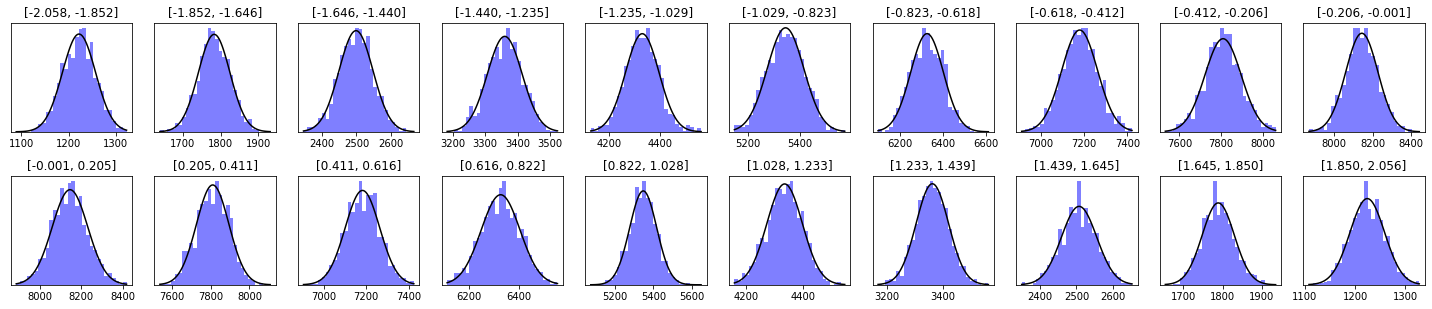

In [3]:
b = BinarizedDistribution(stats.norm(), n_bins=20)
b.sample_histograms()
b.plot()

100% (1000 of 1000) |####################| Elapsed Time: 0:00:07 Time:  0:00:07


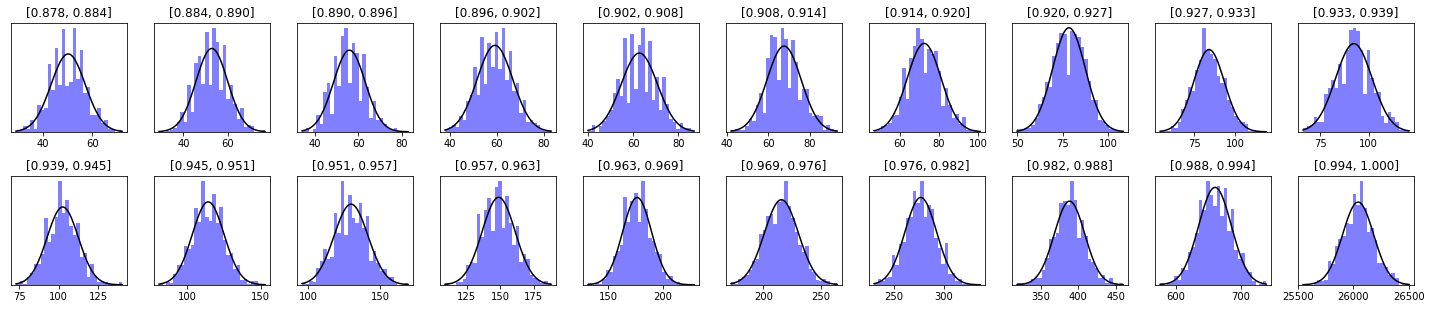

In [17]:
b = BinarizedDistribution(stats.beta(a=1,b=.01), n_bins=20)
b.sample_histograms()
b.plot()

100% (1000 of 1000) |####################| Elapsed Time: 0:00:04 Time:  0:00:04


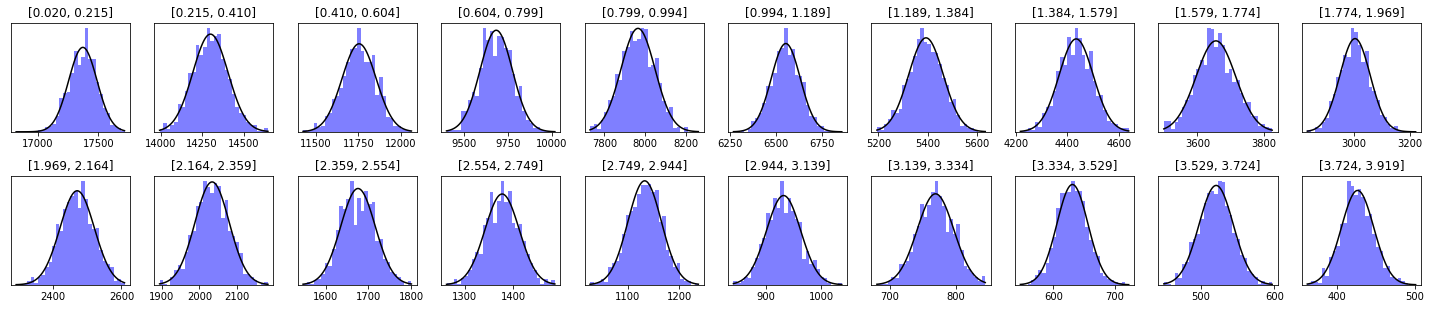

In [18]:
b = BinarizedDistribution(stats.expon(), n_bins=20)
b.sample_histograms()
b.plot()

In [5]:
class NormExp:
    
    def __init__(self, t, mu_s, sigma_s, mu):
        self.b = stats.expon(scale=1/t)
        self.s = stats.norm(loc=mu_s, scale=sigma_s)           
        self.mu = mu
        
        
    def rvs(self, n):
        nb = int(n/(1+self.mu))
        ns = n - nb
        xb = list(self.b.rvs(nb))
        xs = list(self.s.rvs(ns))
        return np.random.permutation(xb+xs)
        
        

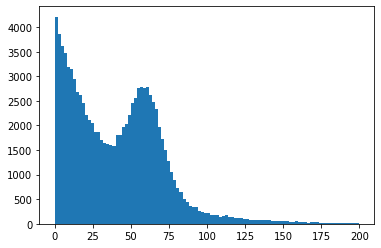

In [12]:
ne = NormExp(t=0.03, mu_s=60, sigma_s=11, mu=.4)
x = ne.rvs(100000)
x = x[x<200]
plt.hist(x, bins=100);


100% (10000 of 10000) |##################| Elapsed Time: 0:00:24 Time:  0:00:24


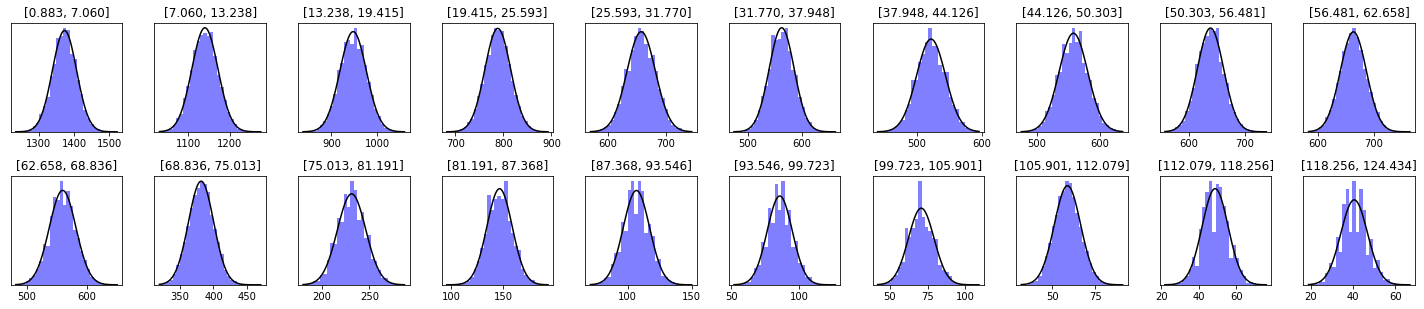

In [16]:
b = BinarizedDistribution(ne, n_bins=20, n_samples_per_histogram=10000, n_histograms=10000)#,  hist_range=(0,100))
b.sample_histograms()
b.plot()